#                                     Music Genre Classification

In [17]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sp
from scipy.fftpack import fft
from scipy.io import wavfile # get the api
import sunau;
import librosa
import librosa.display
import pandas
import os
np.set_printoptions(suppress=True)

This module contains functions for writing the Matrix to a file, reading the Matrix from the file and reaing the CSV file after its genereated in the last module. 

In [41]:
def writeMatrixToFile(self,filename,matrix):
        np.save(filename, matrix);
        os.rename(filename+".npy", filename+".txt");
        print("Written successfully..");
        pass;
    
def loadMatrixFromFile(self,filename):        
    matrix=None;
    if(os.path.isfile(filename)):
        matrix=np.load(filename);       
    return matrix;

def readCSVFile(file):
    data=pandas.read_csv(file,",",header=0, na_values='?', skipinitialspace=True);
    return data;
    pass;


This Module contains the Class for pre processing data which is in the format of '.au', and generating Short term fourier transform, Spectro Graph, Centroid, Spectral Rolloff, Zero Crossing, Spectral Contrast, MFCC, RMS. In the save spectrogram module, i am saving the Power Spectrogram generated in the later module into a folder on the system. 

In [19]:
class PreProcessing:
    filename=None;
    y=None;
    sr=None;
    log_enabled=True;
    centroid=None;
    spectro=None;
    spectro_phase=None;
    max_sample_vector_size=660000; 
    duration=30;
    
    def __init__(self,filename,duration=30):
        #self.log(filename);
        self.filename=filename;
        self.reloadAudioFile(duration);
        self.duration=duration;
        pass;
    
    def reloadAudioFile(self,duration=30):
        self.y, self.sr = librosa.load(self.filename,duration=duration);
        self.y=self.y[:self.max_sample_vector_size];
        pass;
    
    #Short-Term-Fourier trasform
    def getSTFT(self):
        self.stft=librosa.stft(y=self.y);
        return self.stft;
        pass;
    
    #spectro graph
    def getSpectrogram(self):
        stft=self.getSTFT();
        self.spectro, self.spectro_phase = librosa.magphase(stft);        
        return self.spectro, self.spectro_phase;
        pass;
    
    def getCentroid(self):
        self.centroid=librosa.feature.spectral_centroid(y=self.y,sr=self.sr);
        return self.centroid;    

    def getSpectralRolloff(self):
        self.rolloff=librosa.feature.spectral_rolloff(y=self.y, sr=self.sr);
        return self.rolloff;
    
    def getZeroCrossing(self):
        self.zero_crossing_rate=librosa.feature.zero_crossing_rate(self.y);
        return self.zero_crossing_rate;
    
    def getSpectralContrast(self):
        S = np.abs(self.getSTFT());
        self.contrast = librosa.feature.spectral_contrast(S=S, sr=self.sr);
        return self.contrast;
    
    def getMFCC(self):
        self.mfcc = librosa.feature.mfcc(y=self.y, sr=self.sr, hop_length=512, n_mfcc=13);
        return self.mfcc;
    
    def getRMS(self):
        self.rms=librosa.feature.rmse(y=self.y);
        return self.rms;

    def drawRMS(self):
        rms=self.getRMS();
        S,phase=self.getSpectrogram();
        plt.figure()
        plt.subplot(2, 1, 1)
        plt.semilogy(rms.T, label='RMS Energy')
        plt.xticks([])
        plt.xlim([0, rms.shape[-1]])
        plt.legend(loc='best')
        plt.subplot(2, 1, 2)
        librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time')
        plt.title('log Power spectrogram')
        plt.tight_layout()
        plt.show();
        pass;
    
    def saveRMS(self):
        rms=self.getRMS();
        S,phase=self.getSpectrogram();
        S = np.abs(self.getSTFT());
        plt.figure()
        librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),y_axis='log', x_axis='time')
        plt.title('log Power spectrogram')
        plt.savefig(self.filename+'.png')
        pass;
    
    
    def drawSpectrogramWithCentroid(self):
        centroid=self.getCentroid();
        S,phase=self.getSpectrogram();
        plt.figure()
        plt.subplot(2, 1, 1)
        plt.semilogy(centroid.T, label='Spectral centroid')
        plt.ylabel('Hz')
        plt.xticks([])
        plt.xlim([0, centroid.shape[-1]])
        plt.legend()
        plt.subplot(2, 1, 2)
        librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time')
        plt.title('log Power spectrogram')
        plt.tight_layout();
        pass;
    
    def saveSpectogram(self):
        rms=self.getRMS();
        my_dpi = 96;
        S,phase=self.getSpectrogram();
        S = np.abs(self.getSTFT());
        plt.figure(figsize = (3.125, 2.0835), dpi = my_dpi)
        librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max))
        plt.savefig(self.filename+'.png')
        pass;
    
    def drawSpectralRolloff(self):
        rolloff=self.getSpectralRolloff();
        S,phase=self.getSpectrogram();
        plt.figure()
        plt.subplot(2, 1, 1)
        plt.semilogy(rolloff.T, label='Roll-off frequency')
        plt.ylabel('Hz')
        plt.xticks([])
        plt.xlim([0, rolloff.shape[-1]])
        plt.legend()
        plt.subplot(2, 1, 2)
        librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time')
        plt.title('log Power spectrogram')
        plt.tight_layout();
        plt.show();
        pass;
    
    def drawSpectralContrast(self):
        contrast=self.getSpectralContrast();
        S,phase=self.getSpectrogram();
        S = np.abs(self.getSTFT());
        plt.figure()
        plt.subplot(2, 1, 1)
        librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),y_axis='log')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Power spectrogram')
        plt.subplot(2, 1, 2)
        librosa.display.specshow(contrast, x_axis='time')
        plt.colorbar()
        plt.ylabel('Frequency bands')
        plt.title('Spectral contrast')
        plt.tight_layout();
        #plt.show();
        pass;
    
    def drawMFCC(self):
        mfccs=self.getMFCC();
        plt.figure(figsize=(6, 4))
        librosa.display.specshow(mfccs, x_axis='time')
        #plt.colorbar()
        plt.title('MFCC')
        plt.tight_layout()
        plt.show();
        pass;
    
    
    def log(self,a,b=None):
        if(self.log_enabled):
            if(b!=None):
                print(a,b);
            else:
                print(a);
        pass;


This class preprocesses the audio files and generates the audiofeatures.csv data file. 

In [20]:
class ProcessDataset:
    columns = ["id","type","y","centroid mean","centroid var","rolloff mean","rolloff var","zero mean","zero var","rms mean","rms var","contrast mean","contrast var","mfcc1 mean","mfcc1 var","mfcc2 mean","mfcc2 var","mfcc3 mean","mfcc3 var","mfcc4 mean","mfcc4 var","mfcc5 mean","mfcc5 var"];
    genre_out={"blues":[1,0,0,0,0,0,0,0,0,0],"classical":[0,1,0,0,0,0,0,0,0,0],"country":[0,0,1,0,0,0,0,0,0,0],"disco":[0,0,0,1,0,0,0,0,0,0],"hiphop":[0,0,0,0,1,0,0,0,0,0],"jazz":[0,0,0,0,0,1,0,0,0,0],"metal":[0,0,0,0,0,0,1,0,0,0],"pop":[0,0,0,0,0,0,0,1,0,0],"reggae":[0,0,0,0,0,0,0,0,1,0],"rock":[0,0,0,0,0,0,0,0,0,1]};
    dataframe=None;
    mfcc_features=5;
    dir="../genres";
    genre_dir={"blues":"blues","classical":"classical","country":"country","disco":"disco","hiphop":"hiphop","jazz":"jazz","metal":"metal","pop":"pop","reggae":"reggae","rock":"rock"};
    def __init__(self):
        self.dataframe = pandas.DataFrame(columns=self.columns);
        pass;

    def extractTimberalFeatures(self,genre,audio_number,filename):
        features=[];
        pp=PreProcessing(filename);            
        centroid=pp.getCentroid()[0];
        rolloff=pp.getSpectralRolloff()[0];        
        zero=pp.getZeroCrossing()[0];        
        contrast=pp.getSpectralContrast()[0];        
        rms=pp.getRMS()[0];
        mfcc=rms=pp.getMFCC();
        
        features.append(audio_number);
        features.append(genre);        
        features.append(self.genre_out[genre]);
        features.append(centroid.mean());
        features.append(centroid.var()); 
        features.append(rolloff.mean());
        features.append(rolloff.var()); 
        features.append(zero.mean());
        features.append(zero.var()); 
        features.append(rms.mean());
        features.append(rms.var()); 
        features.append(contrast.mean());
        features.append(contrast.var()); 
        for i in range(self.mfcc_features):
            features.append(mfcc[i].mean());
            features.append(mfcc[i].var());             
        self.dataframe.loc[self.dataframe.size]=features;
    
    def saveDataFrame(self):
        filename="audiofeatures_numpy_matrix";
        arr=self.dataframe.as_matrix(columns=None);
        np.save(filename,arr);       
        self.dataframe.to_csv("audiofeatures.csv",sep=",")
        print("Written successfully..");
        pass;
    
    def extractFeatures(self):
        print("Extracting Features...");
        percent_completed=0;        
        for k in self.genre_dir:    
            genre=k;
            print("-------------------["+genre+"]-----------------------")
            for i in range(100):
                audio_number="%0.5d"%i;
                filename=self.dir+"/"+self.genre_dir[genre]+"/"+self.genre_dir[genre]+"."+audio_number+".au";              
                self.extractTimberalFeatures(genre,audio_number,filename);  
                percent_completed=i;
                if(percent_completed%10==0):
                    print("Percent completed:",percent_completed);            
        self.saveDataFrame();
        print("Extraction done");
        pass;


In [21]:
p1=ProcessDataset();
p1.extractFeatures();
p1.dataframe

Extracting Features...
-------------------[blues]-----------------------
Percent completed: 0
Percent completed: 10
Percent completed: 20
Percent completed: 30
Percent completed: 40
Percent completed: 50
Percent completed: 60
Percent completed: 70
Percent completed: 80
Percent completed: 90
-------------------[classical]-----------------------
Percent completed: 0
Percent completed: 10
Percent completed: 20
Percent completed: 30
Percent completed: 40
Percent completed: 50
Percent completed: 60
Percent completed: 70
Percent completed: 80
Percent completed: 90
-------------------[country]-----------------------
Percent completed: 0
Percent completed: 10
Percent completed: 20
Percent completed: 30
Percent completed: 40
Percent completed: 50
Percent completed: 60
Percent completed: 70
Percent completed: 80
Percent completed: 90
-------------------[disco]-----------------------
Percent completed: 0
Percent completed: 10
Percent completed: 20
Percent completed: 30
Percent completed: 40
Perce

,id,type,y,centroid mean,centroid var,rolloff mean,rolloff var,zero mean,zero var,rms mean,...,mfcc1 mean,mfcc1 var,mfcc2 mean,mfcc2 var,mfcc3 mean,mfcc3 var,mfcc4 mean,mfcc4 var,mfcc5 mean,mfcc5 var
0,00000,blues,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1784.808293,1.298875e+05,3808.046818,9.014349e+05,0.083024,0.000768,3.117747,...,-113.610381,2569.194411,121.526927,295.745460,-19.119716,234.920347,42.345833,150.987558,-6.397207,167.927718
23,00001,blues,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1529.004413,3.760977e+05,3545.433548,2.973528e+06,0.055998,0.001450,-0.015549,...,-207.681018,7768.972485,124.028813,561.000281,8.921462,573.457567,35.872568,265.096775,2.953947,279.591975
46,00002,blues,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1552.846406,1.571395e+05,3041.990598,7.870677e+05,0.076251,0.001009,3.360072,...,-90.777321,3325.262959,140.435236,511.089229,-29.103523,412.718063,31.721170,144.410624,-14.020489,155.647027
69,00003,blues,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1070.101733,1.848173e+05,2185.494924,1.496507e+06,0.033294,0.000424,0.903768,...,-199.214954,5473.706974,150.116757,457.395894,5.624721,257.145733,26.894443,158.092081,1.718505,267.438083
92,00004,blues,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1836.253062,3.434938e+05,3582.540766,1.572658e+06,0.101533,0.001957,-9.646369,...,-160.164236,5194.827510,126.164368,854.363125,-35.631958,333.701990,22.155179,193.870898,-32.500346,336.841970
115,00005,blues,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1830.597500,1.031766e+06,3477.770883,3.275813e+06,0.093881,0.006246,-8.241767,...,-178.161475,7261.502059,118.232531,3201.834067,-17.507661,654.692881,30.727868,486.886645,-21.697610,433.307538
138,00006,blues,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1458.485232,4.385955e+05,2795.268498,1.625111e+06,0.072895,0.001906,-7.933100,...,-190.413000,9621.968625,130.287953,1937.828877,-36.281953,1307.322899,32.963734,479.807572,11.117756,1086.085849
161,00007,blues,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1452.001343,4.505745e+05,2956.475404,1.631752e+06,0.061360,0.001851,-4.548900,...,-179.470540,6585.181225,136.412066,1481.331676,-26.569359,588.098875,39.983234,353.448005,5.286011,651.413540
184,00008,blues,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1719.169358,1.636768e+05,3781.355662,1.264795e+06,0.063963,0.000735,3.494870,...,-121.346163,2628.235828,122.490888,415.206500,-14.740449,341.918156,46.158053,193.797996,-8.131584,176.808684
207,00009,blues,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1818.133974,2.985595e+05,3946.067973,1.368812e+06,0.079256,0.001378,-6.909227,...,-213.059514,6135.013168,115.140249,800.245340,-11.748841,669.105469,39.072191,350.071650,-20.355863,533.124874


In [22]:
dir="../genres";
genre_dir={"blues":"blues","classical":"classical","country":"country","disco":"disco","hiphop":"hiphop","jazz":"jazz","metal":"metal","pop":"pop","reggae":"reggae","rock":"rock"};

In [24]:
genre="disco"

audio_number="%0.5d"%0;
filename=dir+"/"+genre_dir[genre]+"/"+genre_dir[genre]+"."+audio_number+".au";  

pp=PreProcessing(filename); 
s,p=pp.getSpectrogram();
len(s)

1025

In [25]:
genre="disco"
audio_number="%0.5d"%0;
filename=dir+"/"+genre_dir[genre]+"/"+genre_dir[genre]+"."+audio_number+".au";  

pp=PreProcessing(filename); 
a=librosa.feature.melspectrogram(y=pp.y, sr=pp.sr,n_mels=10)
len(a[0])

1290

In [26]:
genre="disco"
pds=ProcessDataset();

audio_number="%0.5d"%98;
filename=dir+"/"+genre_dir[genre]+"/"+genre_dir[genre]+"."+audio_number+".au";  
pds.extractTimberalFeatures(genre,audio_number,filename);

audio_number="%0.5d"%99;
filename=dir+"/"+genre_dir[genre]+"/"+genre_dir[genre]+"."+audio_number+".au";  
pds.extractTimberalFeatures(genre,audio_number,filename);

audio_number="%0.5d"%0;
filename=dir+"/"+genre_dir[genre]+"/"+genre_dir[genre]+"."+audio_number+".au";  
pds.extractTimberalFeatures(genre,audio_number,filename);

#pds.extractFeatures();
pds.dataframe

,id,type,y,centroid mean,centroid var,rolloff mean,rolloff var,zero mean,zero var,rms mean,...,mfcc1 mean,mfcc1 var,mfcc2 mean,mfcc2 var,mfcc3 mean,mfcc3 var,mfcc4 mean,mfcc4 var,mfcc5 mean,mfcc5 var
0,00098,disco,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",2417.547068,353628.074873,5384.369095,1.415671e+06,0.112626,0.002695,1.231443,...,-91.497804,1842.064409,99.477408,425.560043,-9.012530,268.381157,40.194843,204.077992,-18.060303,144.707137
23,00099,disco,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",2417.547068,353628.074873,5384.369095,1.415671e+06,0.112626,0.002695,1.231443,...,-91.497804,1842.064409,99.477408,425.560043,-9.012530,268.381157,40.194843,204.077992,-18.060303,144.707137
46,00000,disco,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",2295.772581,900969.818273,4884.139433,3.897930e+06,0.096195,0.007041,2.238053,...,-111.432015,4385.804208,94.082665,1435.652549,12.515866,567.824077,16.748006,199.799226,8.177988,156.219142


-------------------[blues]-----------------------


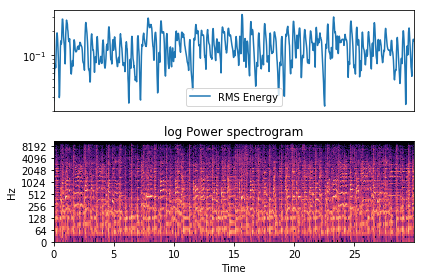

[[ 0.02698701  0.03934191  0.0497628  ...,  0.15843858  0.15728986
   0.15020838]]
0 : 1290  ylen: 660000  sr: 22050
-------------------[classical]-----------------------


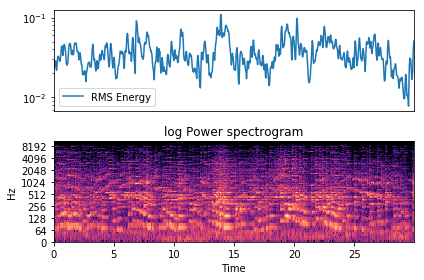

[[ 0.0295148   0.02779332  0.02758028 ...,  0.03931727  0.04492102
   0.05081862]]
0 : 1290  ylen: 660000  sr: 22050
-------------------[country]-----------------------


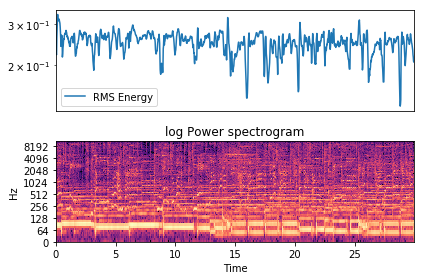

[[ 0.22743991  0.22301172  0.22345297 ...,  0.21640648  0.207847
   0.20620328]]
0 : 1290  ylen: 660000  sr: 22050
-------------------[disco]-----------------------


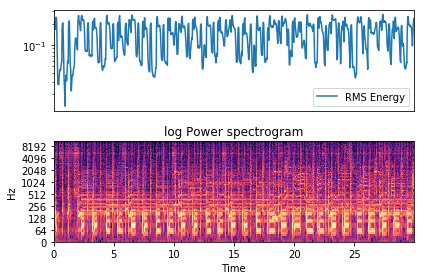

[[ 0.20593779  0.21168591  0.21374369 ...,  0.20123817  0.2246698
   0.23688845]]
0 : 1290  ylen: 660000  sr: 22050
-------------------[hiphop]-----------------------


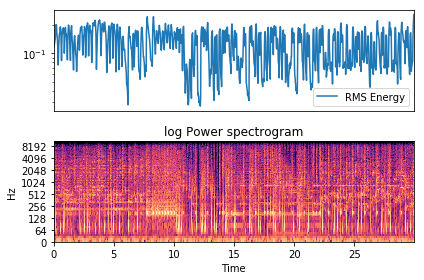

[[ 0.11441802  0.11529787  0.12211477 ...,  0.19405326  0.22757268
   0.2586143 ]]
0 : 1290  ylen: 660000  sr: 22050
-------------------[jazz]-----------------------


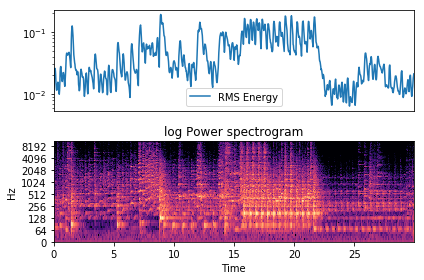

[[ 0.01100503  0.01350269  0.01803598 ...,  0.01810335  0.01982369
   0.02121461]]
0 : 1290  ylen: 660000  sr: 22050
-------------------[metal]-----------------------


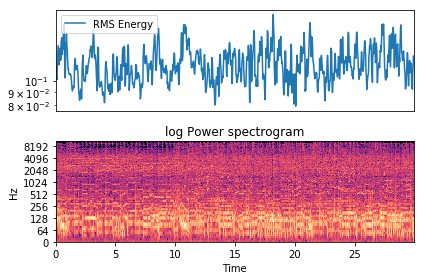

[[ 0.11008547  0.11247963  0.10696381 ...,  0.11951169  0.12471908
   0.11664373]]
0 : 1290  ylen: 660000  sr: 22050
-------------------[pop]-----------------------


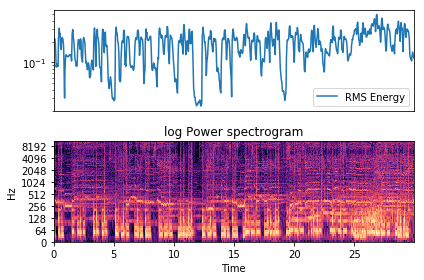

[[ 0.21794872  0.22330737  0.21247801 ...,  0.12657666  0.12116783
   0.11529022]]
0 : 1290  ylen: 660000  sr: 22050
-------------------[reggae]-----------------------


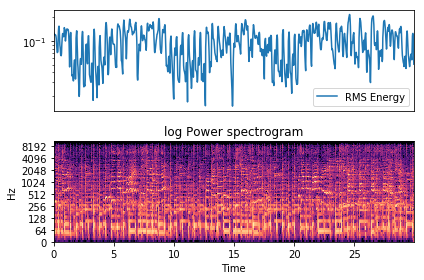

[[ 0.1259803   0.12389277  0.12273667 ...,  0.10943095  0.06877495
   0.05077007]]
0 : 1290  ylen: 660000  sr: 22050
-------------------[rock]-----------------------


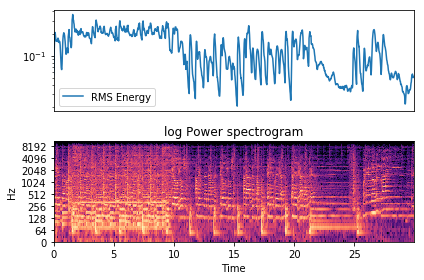

[[ 0.05534783  0.06644138  0.12055855 ...,  0.05064309  0.05238191
   0.05209959]]
0 : 1290  ylen: 660000  sr: 22050


In [27]:
#RMS
for k in genre_dir:    
    genre=k;
    print("-------------------["+genre+"]-----------------------")
    ta=[];
    for i in range(1):
        audio_number="%0.5d"%i;
        filename=dir+"/"+genre_dir[genre]+"/"+genre_dir[genre]+"."+audio_number+".au"; 
        pp=PreProcessing(filename);        
        pp.drawRMS();
        print(pp.getRMS()); 
        ta.append(len(pp.y));
        print(i,":",len(pp.getRMS()[0])," ylen:",len(pp.y)," sr:",pp.sr); 
    #break;
        

-------------------[blues]-----------------------


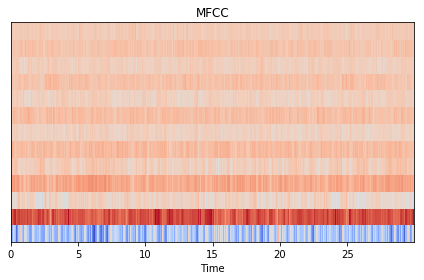

[[-211.48465086 -208.94482648 -193.90886432 ...,  -65.82020586
   -80.20919578  -86.21557811]
 [  99.02296527  101.24677684  102.2439539  ...,  135.65003173
   143.80579045  156.54167762]
 [ -10.63469419   -9.34669827    1.91543412 ...,  -54.71486638
   -58.89258289  -62.45837665]
 ..., 
 [  -2.15099456   -3.70855898   -9.18501171 ...,  -11.32179633
   -12.63146643  -13.43400469]
 [  -2.54508296    0.64133669   -2.12721967 ...,    6.29535341
     6.72456072    5.85397971]
 [  -2.38363632   -1.69193586   -3.84490394 ...,    1.07198403    4.1297039
     3.42416824]]
0 : 1290  ylen: 660000  sr: 22050


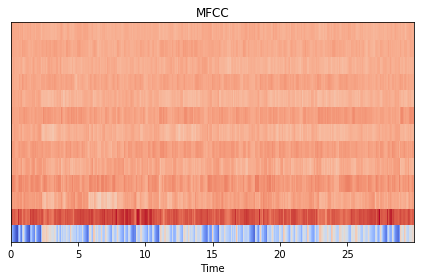

[[-312.9024927  -223.67753201 -156.06528249 ..., -103.4453411  -102.90146389
  -102.28549155]
 [ 164.21044825  144.91584358  133.97658004 ...,  110.29439393
   112.36127221  116.76424492]
 [   6.49667052   12.93724929   11.93124231 ...,   23.79641151
    22.40478787   19.17921236]
 ..., 
 [   1.78545078    1.24850741   -1.95793918 ...,  -10.65261569
   -10.97147072   -6.97794895]
 [  -8.28873383    3.41443903    8.51335514 ...,   -0.66334213
     0.97949663    6.06326644]
 [  -4.84381704   -4.6451709    -1.97871748 ...,   -6.94637914
    -3.00075789    0.29381488]]
1 : 1290  ylen: 660000  sr: 22050


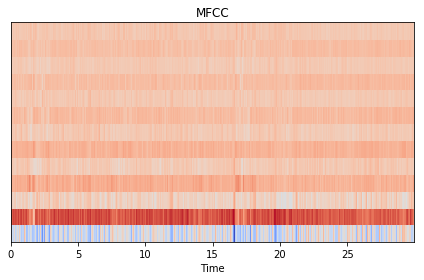

[[ -60.05452286  -71.44896576  -96.38280585 ...,  -97.32023262
   -73.38643074  -95.10403502]
 [ 147.24526426  149.00152944  141.75261469 ...,  132.02599786
   116.55555629   97.56697645]
 [ -53.2511058   -44.86586128  -32.56983997 ...,  -21.44545764  -18.6456541
    -6.58609609]
 ..., 
 [ -21.79465432  -17.32981878   -8.68030727 ...,   -9.69074401
   -10.38192982  -12.29330774]
 [   5.59060054    7.1561059    10.24106645 ...,    8.73906494
    11.19488463    8.59406165]
 [ -11.43777632  -16.06221102  -16.29951254 ...,   -5.58634707
    -8.64932261  -13.53581383]]
2 : 1290  ylen: 660000  sr: 22050


In [28]:
#MFCC
for k in genre_dir:    
    genre=k;
    print("-------------------["+genre+"]-----------------------")
    ta=[];
    for i in range(3):
        audio_number="%0.5d"%i;
        filename=dir+"/"+genre_dir[genre]+"/"+genre_dir[genre]+"."+audio_number+".au"; 
        pp=PreProcessing(filename);        
        pp.drawMFCC();
        print(pp.getMFCC()); 
        ta.append(len(pp.y));
        print(i,":",len(pp.getMFCC()[0])," ylen:",len(pp.y)," sr:",pp.sr); 
    break;

In [29]:
#Zero crossing
for k in genre_dir:    
    genre=k;
    print("-------------------["+genre+"]-----------------------")
    ta=[];
    for i in range(3):
        audio_number="%0.5d"%i;
        filename=dir+"/"+genre_dir[genre]+"/"+genre_dir[genre]+"."+audio_number+".au"; 
        pp=PreProcessing(filename,10);
        print(pp.getZeroCrossing()); 
        ta.append(len(pp.y));
        print(i,":",len(pp.getZeroCrossing()[0])," ylen:",len(pp.y)," sr:",pp.sr); 
    break;

-------------------[blues]-----------------------
[[ 0.06494141  0.08300781  0.10791016  0.10351562  0.09423828  0.08935547
   0.08447266  0.08447266  0.08300781  0.09082031  0.09619141  0.08251953
   0.07324219  0.07421875  0.07421875  0.08496094  0.10107422  0.10986328
   0.11132812  0.10302734  0.09326172  0.08496094  0.0703125   0.07177734
   0.06591797  0.05761719  0.05761719  0.05126953  0.05273438  0.0625
   0.07324219  0.08398438  0.09472656  0.09082031  0.08691406  0.08007812
   0.07568359  0.07373047  0.06689453  0.06347656  0.05126953  0.04736328
   0.0546875   0.05273438  0.06445312  0.06542969  0.06689453  0.07714844
   0.0703125   0.07128906  0.07568359  0.07324219  0.07373047  0.06884766
   0.0625      0.06152344  0.0625      0.07128906  0.07177734  0.07421875
   0.07373047  0.06640625  0.06835938  0.06982422  0.06494141  0.06494141
   0.06542969  0.05175781  0.05078125  0.0546875   0.06884766  0.09130859
   0.10400391  0.11376953  0.10205078  0.10009766  0.09863281  0.0

[[ 0.04638672  0.06396484  0.0859375   0.08300781  0.07519531  0.07128906
   0.06982422  0.06396484  0.07226562  0.07373047  0.06884766  0.06982422
   0.05957031  0.05419922  0.05419922  0.05126953  0.05419922  0.06347656
   0.06640625  0.07080078  0.08349609  0.07763672  0.07617188  0.07714844
   0.06201172  0.06103516  0.05322266  0.05859375  0.06347656  0.06640625
   0.07763672  0.07714844  0.08105469  0.08642578  0.09082031  0.08398438
   0.07519531  0.06738281  0.06591797  0.06054688  0.06298828  0.06054688
   0.05078125  0.07080078  0.07617188  0.08056641  0.0859375   0.07080078
   0.06445312  0.06591797  0.0625      0.04833984  0.04052734  0.02783203
   0.02587891  0.04101562  0.04833984  0.05566406  0.05175781  0.05126953
   0.05810547  0.06689453  0.08837891  0.09814453  0.109375    0.109375
   0.09277344  0.08496094  0.07861328  0.07714844  0.08740234  0.125
   0.21386719  0.29638672  0.38427734  0.44091797  0.42675781  0.35205078
   0.25488281  0.15917969  0.078125    0.0649

This Module generates Power Spectrogram for all the 1000 songs and save them in a file. These power spectrogram images forms our main dataset for CNN Classifier. 

In [36]:
#Spectral Contrast

for k in genre_dir:
    genre=k;
    print("-------------------["+genre+"]-----------------------")
    ta=[];
    for i in range(100):
        audio_number="%0.5d"%i;
        filename=dir+"/"+genre_dir[genre]+"/"+genre_dir[genre]+"."+audio_number+".au"; 
        #print (filename)
        pp=PreProcessing(filename);
        pp.drawSpectralContrast();
        pp.saveSpectogram();
        ta.append(len(pp.y));
    break;  

-------------------[blues]-----------------------


blues
-------------------[blues]-----------------------


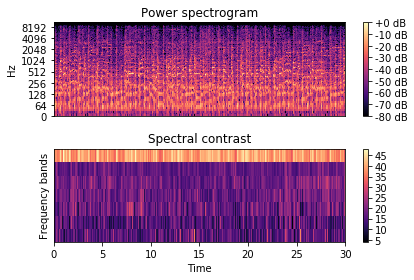

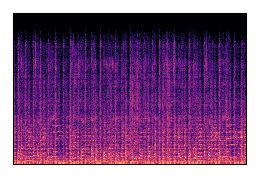

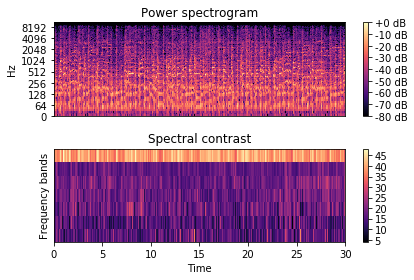

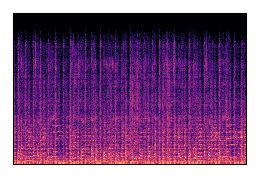

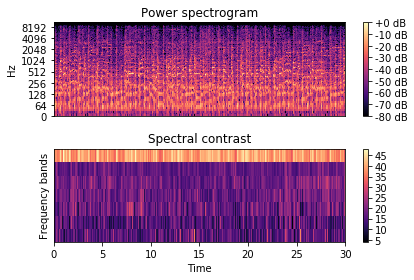

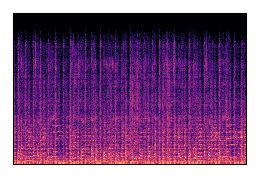

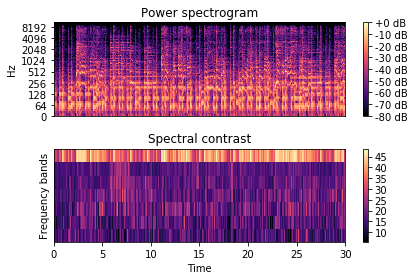

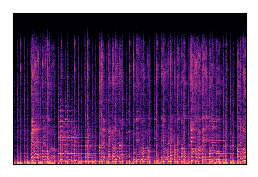

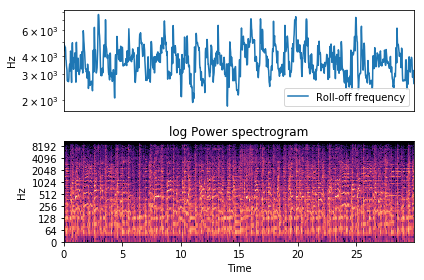

[[ 4844.97070312  4661.93847656  4715.77148438 ...,  3165.38085938
   2896.21582031  2605.51757812]]
0 : 1290  ylen: 660000  sr: 22050
blues  ymin: 660000  max: 660000


In [37]:
#SpectralRolloff
for k in genre_dir:    
    genre=k;
    print(genre)
    print("-------------------["+genre+"]-----------------------")
    ta=[];
    for i in range(1):
        audio_number="%0.5d"%i;
        filename=dir+"/"+genre_dir[genre]+"/"+genre_dir[genre]+"."+audio_number+".au"; 
        pp=PreProcessing(filename);
        pp.drawSpectralRolloff();
        print(pp.getSpectralRolloff()); 
        ta.append(len(pp.y));
        print(i,":",len(pp.getSpectralRolloff()[0])," ylen:",len(pp.y)," sr:",pp.sr);    
    print(genre," ymin:",np.min(ta),' max:',np.max(ta));
    break;

In this module we divide our 'audiofeatures.csv' file into testing(20%) and training(80%) and save them as test.csv and train.csv

In [39]:
def partitionDataFrame(df,ratio):
    df = df.sample(frac=1).reset_index(drop=True)#shuffling rows
    df = df.sample(frac=1).reset_index(drop=True)#again shuffling
    size=df["id"].count();
    limit=int(ratio*size);
    train_ds=df.loc[0:limit];    
    test_ds=df.loc[limit:size];
    train_ds.to_csv("train.csv",sep=",");
    test_ds.to_csv("test.csv",sep=",");
    print("Partitioning done");

In [42]:
df=readCSVFile("audiofeatures.csv");
partitionDataFrame(df,0.8);

Partitioning done
